# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [191]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable
from __future__ import division
import scipy.stats as stats

In [192]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [193]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

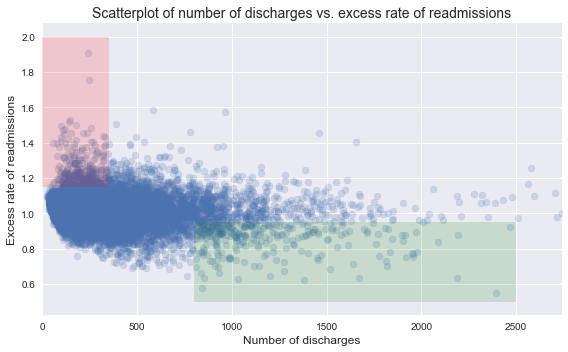

In [194]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

#### The above analysis is accurate in its statistical significance. There is a significant correlation between the number of discharges and the readmission rates. I don't agree with the recommendations from the preliminary analysis though. The trade off to reduce the readmission rate for smaller hospitals may not be worth the requirement of demonstrated upgrades of resources. Further analysis would be required to make a more definitive statement here. The preliminary analysis also didn't seem to clarify how it determined a "small" vs "large" hospital and what considerations were made before making that decision. Based upon the dataset, the percentiles of the hospital data collected would better serve for finding a more approporiate line to separate the two groups. 

In [15]:
df = clean_hospital_read_df

In [16]:
df.head()

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
16857,THREE RIVERS MEDICAL CENTER,180128,KY,READM-30-HIP-KNEE-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14582,SELLS INDIAN HEALTH SERVICE HOSPITAL,30074,AZ,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15606,PHS INDIAN HOSPITAL AT PINE RIDGE,430081,SD,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
15615,FLORIDA STATE HOSPITAL UNIT 31 MED,100298,FL,READM-30-COPD-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013
14551,GREENE COUNTY HOSPITAL,10051,AL,READM-30-AMI-HRRP,0,7.0,NaN,NaN,NaN,NaN,07/01/2010,06/30/2013


In [17]:
df = df[['Number of Discharges', 'Excess Readmission Ratio']].dropna()
df.columns = ['Discharges', 'Ratio']

In [76]:
df.head()

,Discharges,Ratio
1832,25,1.0914
1699,27,1.0961
1774,28,1.0934
1853,29,1.0908
1290,30,1.1123


In [105]:
df.reset_index(drop = True);
df.Discharges = df.Discharges.astype(int)
df.Ratio = df.Ratio.astype(float);

In [106]:
df.describe()

,Discharges,Ratio
count,11497.000000,11497.000000
mean,365.466209,1.007504
std,308.754590,0.091964
min,25.000000,0.549500
25%,160.000000,0.952600
50%,282.000000,1.003500
75%,474.000000,1.058100
max,6793.000000,1.909500


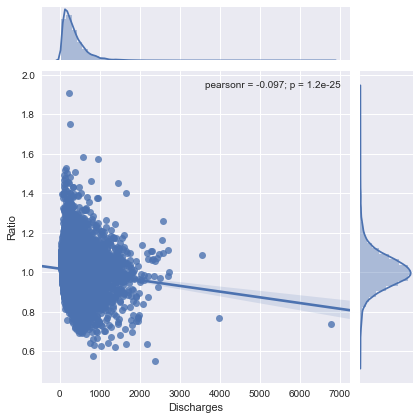

In [107]:
sns.jointplot('Discharges', 'Ratio', data=df, kind='reg')

#### You can see that there are a few values that may be outliers and skewing the data for Larger Hospitals due to the extremely high number of discharges

In [108]:
x = df.Discharges
y = df.Ratio

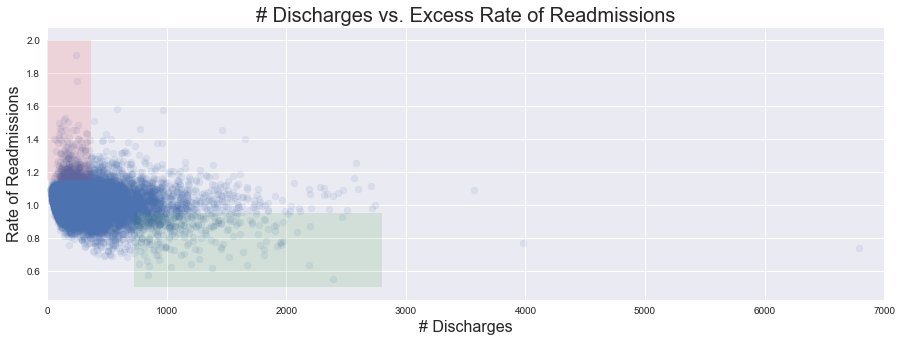

In [109]:
# Plot all values for discharges and Excess Rate of Readmissions
plt.figure(figsize = (15, 5))
plt.scatter(x = x, y = y, alpha = .1)
plt.fill_between([0, 365], 1.15, 2, facecolor = 'red', alpha = .1, interpolate = True)
plt.fill_between([730, 2800], .5, .95, facecolor = 'green', alpha = .1, interpolate = True)
plt.xlim(0, 7000)
plt.xlabel('# Discharges', fontsize = 16)
plt.ylabel('Rate of Readmissions', fontsize = 16)
plt.title('# Discharges vs. Excess Rate of Readmissions', fontsize = 20)

plt.show();

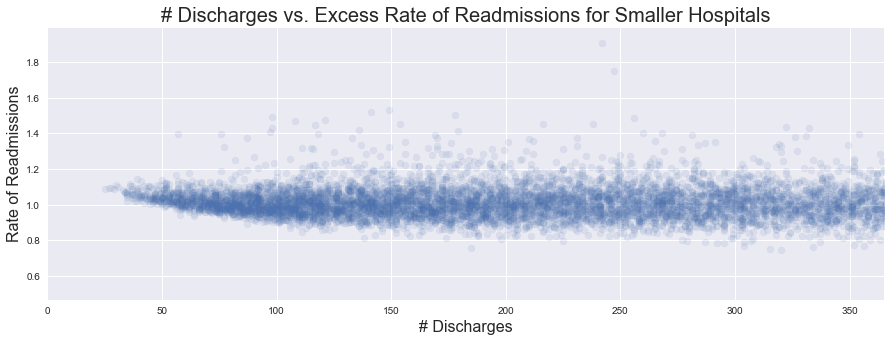

In [110]:
# Plot for smaller hospitals based on number of discharges
plt.figure(figsize = (15, 5))
plt.scatter(x = x, y = y, alpha = .1)
plt.xlim(0, 365)
plt.xlabel('# Discharges', fontsize = 16)
plt.ylabel('Rate of Readmissions', fontsize = 16)
plt.title('# Discharges vs. Excess Rate of Readmissions for Smaller Hospitals', fontsize = 20)

plt.show();

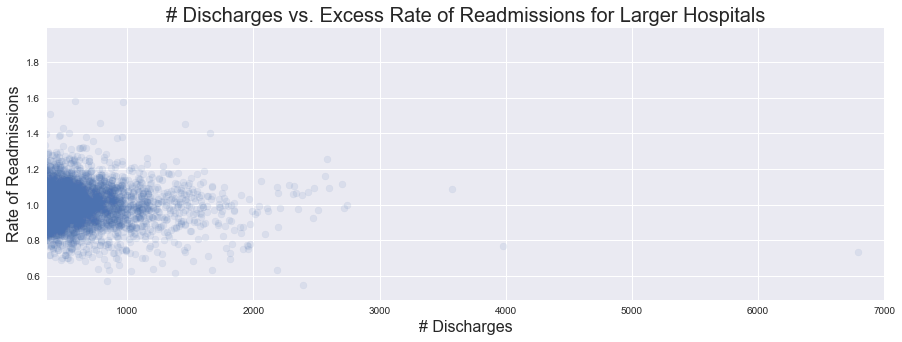

In [111]:
plt.figure(figsize = (15, 5))
plt.scatter(x = x, y = y, alpha = .1)
plt.xlim(365, 7000)
plt.xlabel('# Discharges', fontsize = 16)
plt.ylabel('Rate of Readmissions', fontsize = 16)
plt.title('# Discharges vs. Excess Rate of Readmissions for Larger Hospitals', fontsize = 20)

plt.show();

In [112]:
# These values may be skewing the data as they are potential outliers
(x >= 3000).values.sum()

# What does the larger hospital plot look like without these values?


3

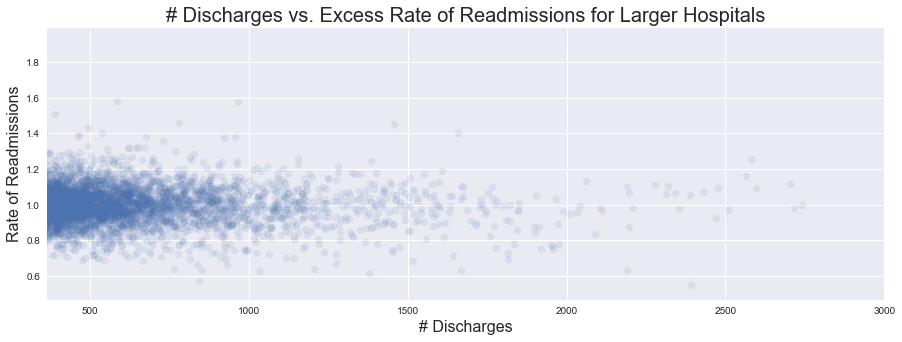

In [113]:
plt.figure(figsize = (15, 5))
plt.scatter(x = x, y = y, alpha = .1)
plt.xlim(365, 3000)
plt.xlabel('# Discharges', fontsize = 16)
plt.ylabel('Rate of Readmissions', fontsize = 16)
plt.title('# Discharges vs. Excess Rate of Readmissions for Larger Hospitals', fontsize = 20)

plt.show();

### What happens to our dataset if we remove the outliers?

In [114]:
df1 = df[df.Discharges < 3000]
df1.describe()

,Discharges,Ratio
count,11494.000000,11494.000000
mean,364.313729,1.007541
std,299.546395,0.091912
min,25.000000,0.549500
25%,159.250000,0.952700
50%,281.000000,1.003550
75%,474.000000,1.058075
max,2740.000000,1.909500


In [115]:
x1 = df1.Discharges
y1 = df1.Ratio

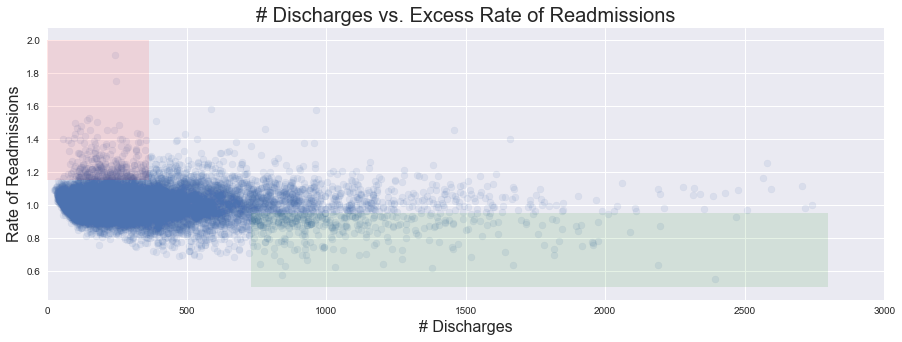

In [116]:
# Plot all values for discharges and Excess Rate of Readmissions
plt.figure(figsize = (15, 5))
plt.scatter(x = x1, y = y1, alpha = .1)
plt.fill_between([0, 365], 1.15, 2, facecolor = 'red', alpha = .1, interpolate = True)
plt.fill_between([730, 2800], .5, .95, facecolor = 'green', alpha = .1, interpolate = True)
plt.xlim(0, 3000)
plt.xlabel('# Discharges', fontsize = 16)
plt.ylabel('Rate of Readmissions', fontsize = 16)
plt.title('# Discharges vs. Excess Rate of Readmissions', fontsize = 20)

plt.show();

### Let's explore further the difference between small vs large hospital ratios using the dataset with outliers removed.

In [117]:
small_1 = df1[df1.Discharges <= 160]
small_1.describe()

,Discharges,Ratio
count,2898.000000,2898.000000
mean,106.789165,1.015972
std,31.887445,0.071801
min,25.000000,0.813900
25%,83.000000,0.970025
50%,108.000000,1.009350
75%,134.000000,1.052200
max,160.000000,1.530800


In [118]:
large_1 = df1[df1.Discharges >= 500]
large_1.describe()

,Discharges,Ratio
count,2611.000000,2611.000000
mean,795.471084,0.995327
std,323.854453,0.107098
min,500.000000,0.549500
25%,576.500000,0.933300
50%,687.000000,0.996600
75%,895.000000,1.061700
max,2740.000000,1.583600


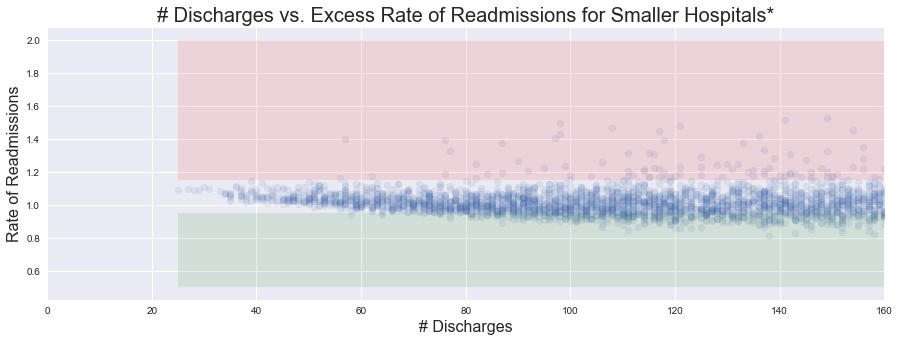

In [119]:
plt.figure(figsize = (15, 5))
plt.scatter(x = x1, y = y1, alpha = .1)
plt.xlim(0, 160)
plt.fill_between([25, 160], 1.15, 2, facecolor = 'red', alpha = .1, interpolate = True)
plt.fill_between([25, 160], .5, .95, facecolor = 'green', alpha = .1, interpolate = True)
plt.xlabel('# Discharges', fontsize = 16)
plt.ylabel('Rate of Readmissions', fontsize = 16)
plt.title('# Discharges vs. Excess Rate of Readmissions for Smaller Hospitals*', fontsize = 20)

plt.show();

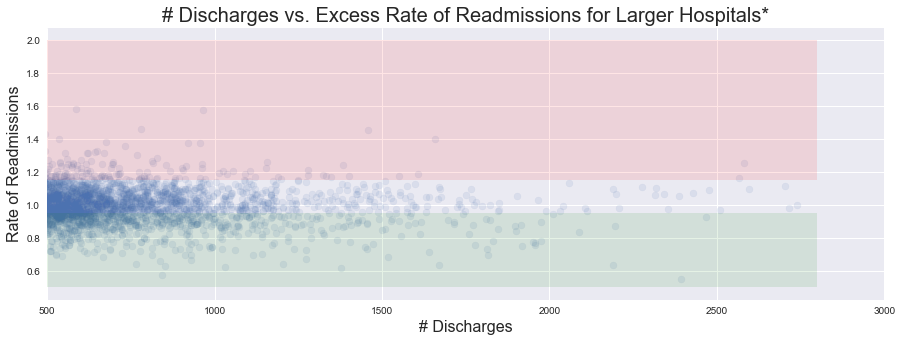

In [120]:
plt.figure(figsize = (15, 5))
plt.scatter(x = x1, y = y1, alpha = .1)
plt.xlim(500, 3000)
plt.fill_between([500, 2800], 1.15, 2, facecolor = 'red', alpha = .1, interpolate = True)
plt.fill_between([500, 2800], .5, .95, facecolor = 'green', alpha = .1, interpolate = True)
plt.xlabel('# Discharges', fontsize = 16)
plt.ylabel('Rate of Readmissions', fontsize = 16)
plt.title('# Discharges vs. Excess Rate of Readmissions for Larger Hospitals*', fontsize = 20)

plt.show();

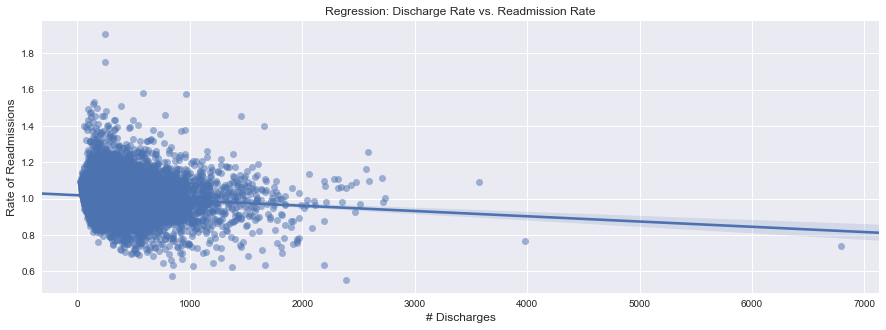

In [183]:
# Number of Discharges v. Rate of Readmission for All Hospitals

sns.set(rc = {'figure.figsize':(15, 5)})
ax = sns.regplot(x = 'Discharges', y = 'Ratio', data = df, scatter_kws = {'alpha':0.5})

plt.xlabel('# Discharges', fontsize = 12)
plt.ylabel('Rate of Readmissions', fontsize = 12)
ax.set_title('Regression: Discharge Rate vs. Readmission Rate');

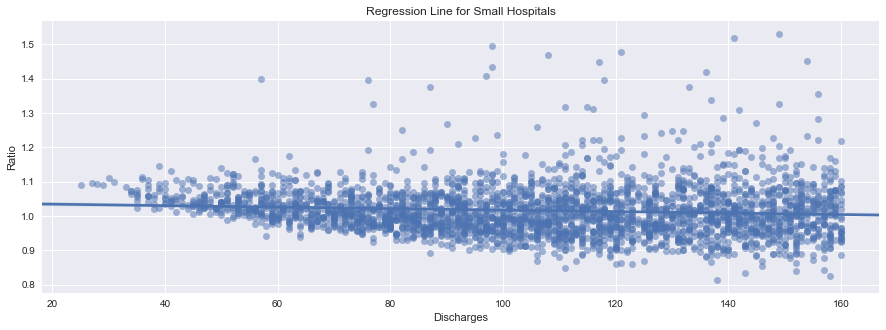

In [184]:
# Number of Discharges v. Rate of Readmission for Small Hospitals 

ax = sns.regplot(x = 'Discharges', y ='Ratio', data = small_1, scatter_kws = {'alpha':0.5})
ax.set_title('Regression Line for Small Hospitals');

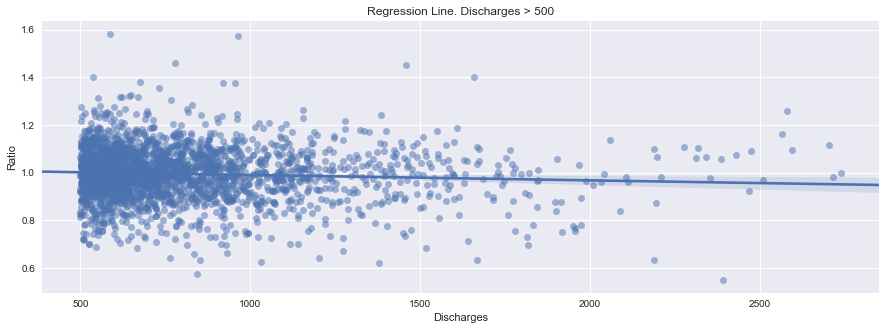

In [123]:
# Number of Discharges v. Rate of Readmission for large hospitals

ax = sns.regplot(x = 'Discharges', y ='Ratio', data = large_1, scatter_kws = {'alpha':0.5})
ax.set_title('Regression Line. Discharges > 500');

In [185]:
# Small and Large Hospital datasets from original dataset

small = df[df.Discharges <= 160]
large = df[df.Discharges >= 500]

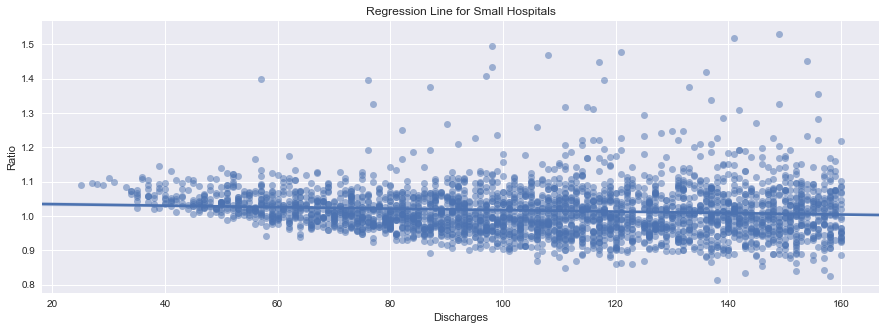

In [186]:
# Number of Discharges v. Rate of Readmission for Small Hospitals 

ax = sns.regplot(x = 'Discharges', y ='Ratio', data = small, scatter_kws = {'alpha':0.5})
ax.set_title('Regression Line for Small Hospitals');

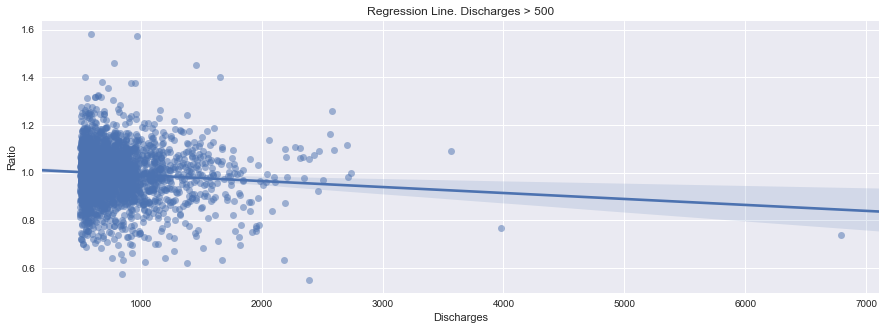

In [187]:
# Number of Discharges v. Rate of Readmission for Large Hospitals

ax = sns.regplot(x = 'Discharges', y ='Ratio', data = large, scatter_kws = {'alpha':0.5})
ax.set_title('Regression Line. Discharges > 500');

In [188]:
# calculate means for both groups with outliers removed
sm_mean = np.mean(small_1.Ratio)
lg_mean = np.mean(large_1.Ratio)

diff = sm_mean - lg_mean

print('Means from dataset with outliers removed\nSmall Hospitals: {:0.5}\nLarge Hospitals: {:0.5}\n\nDifference: {:0.5}'.format(sm_mean, lg_mean, diff))

Means from dataset with outliers removed
Small Hospitals: 1.016
Large Hospitals: 0.99533

Difference: 0.020646


In [190]:
# Calculate means for both Large and Small Hospital data from original datset
small = df[df.Discharges <= 160]
large = df[df.Discharges >= 500]

sm_mean_1 = np.mean(small.Ratio)
lg_mean_1 = np.mean(large.Ratio)

diff_1 = sm_mean_1 - lg_mean_1

print('Means from dataset from original dataset\nSmall Hospitals: {:0.5}\nLarge Hospitals: {:0.5}\n\nDifference: {:0.5}'.format(sm_mean_1, lg_mean_1, diff_1))

Means from dataset from original dataset
Small Hospitals: 1.016
Large Hospitals: 0.99518

Difference: 0.020795


In [171]:
sm_g1 = sum(small.Ratio > 1.0) # = 1620
sm_g1 = sm_g1.astype(int)
sum_t = len(small) # = 2898

print('This is the percent of small hospitals with a Readmission Ratio over 1.0: ')
print((sm_g1 / sum_t) * 100)

This is the percent of small hospitals with a Readmission Ratio over 1.0: 
55.900621118


In [169]:
lg_g1 = sum(large.Ratio > 1.0) 
lg_g1 = lg_g1.astype(int)

print('This is the percent of large hospitals with a Readmission Ratio over 1.0: ')
print((lg_g1 / sum_t) * 100)

This is the percent of large hospitals with a Readmission Ratio over 1.0: 
43.8923395445


In [98]:
small.describe()

,Discharges,Ratio
count,2898.000000,2898.000000
mean,106.789165,1.015972
std,31.887445,0.071801
min,25.000000,0.813900
25%,83.000000,0.970025
50%,108.000000,1.009350
75%,134.000000,1.052200
max,160.000000,1.530800


In [172]:
large.describe()

,Discharges,Ratio
count,2614.000000,2614.000000
mean,800.045142,0.995177
std,354.024564,0.107263
min,500.000000,0.549500
25%,577.000000,0.933300
50%,687.000000,0.996550
75%,895.750000,1.061750
max,6793.000000,1.583600


### Statistical Significance:

### Hypothesis:
#### H0 : There is no correlation between the number of discharges and readmission rate. 
#### r = 0
#### H1 : There is a correlation between the number of discharges and readmission rate. 
#### r is NOT = 0

In [195]:
r = np.corrcoef(df.Discharges, df.Ratio)[0][1]

n = len(df.Discharges)
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r ** 2)
p_value = stats.t.cdf(x = t_stat, df = n - 2) * 2

print('Observed r: {:0.5}'.format(r))
print('Frequentist Results:')
print('t-statistic: {:0.5}'.format(t_stat))
print('p-value: {:0.5}'.format(p_value))

Observed r: -0.097398
Frequentist Results:
t-statistic: -10.492
p-value: 1.2225e-25


### Analysis: 
#### With the p-value result being so low, we must reject the null hypothesis. This means that there is a correlation between the number of discharges and readmission rate. An observed r value of ~ -.097 shows that there is a negative correlation in the number of discharges and readmission rate. 

### Exploration of both large and small hospital data
### Let's begin with Small Hospitals
#### H0 : There is no correlation between the number of discharges and readmission rate. 
#### r = 0
#### H1 : There is a correlation between the number of discharges and readmission rate. 
#### r is NOT = 0

In [196]:
r = np.corrcoef(small.Discharges, small.Ratio)[0][1]

n = len(small.Discharges)
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r ** 2)
p_value = stats.t.cdf(x = t_stat, df = n - 2) * 2

print('Observed r: {:0.5}'.format(r))
print('Frequentist Results:')
print('t-statistic: {:0.5}'.format(t_stat))
print('p-value: {:0.5}'.format(p_value))

Observed r: -0.0958
Frequentist Results:
t-statistic: -5.1792
p-value: 2.3807e-07


#### Results: 
#### A low p-value means we must reject the null hypothesis. There is a slight negative correlation in the number of discharges and readmission rate for Small Hospitals. 

### Now let's explore the Large Hospital dataset
#### H0 : There is no correlation between the number of discharges and readmission rate. 
#### r = 0
#### H1 : There is a correlation between the number of discharges and readmission rate. 
#### r is NOT = 0

In [197]:
r = np.corrcoef(large.Discharges, large.Ratio)[0][1]

n = len(large.Discharges)
t_stat = r * np.sqrt(n - 2) / np.sqrt(1 - r ** 2)
p_value = stats.t.cdf(x = t_stat, df = n - 2) * 2

print('Observed r: {:0.5}'.format(r))
print('Frequentist Results:')
print('t-statistic: {:0.5}'.format(t_stat))
print('p-value: {:0.5}'.format(p_value))

Observed r: -0.082592
Frequentist Results:
t-statistic: -4.2356
p-value: 2.3586e-05


#### Results:
#### Again, a low p-value, so we reject the null hypothesis that this is no correlation between the number of discharges and readmission rate for Large Hospitals. There is a slight negative correlation between the number of discharges and readmission rate for Large Hospitals. 

### Recommendations:
##### After a deeper dive into the dataset it can be said that there is a correlation between the number of discharges and readmission rate. There is a slight negative correlation for small and large hospitals. The determinant in distinguishing a small vs a large hospital was based on the percentiles of the dataset and utilizing a more fair distribution among the total hospitals. 

##### My recommendation would be to stray from the initial recommendation of combining the smaller hospitals as there may be other factors involved in why a larger number of discharges is correlated to readmission rate. A suggestion would be to look at readmission rates from a geographical region perspective as that may provide greater insight as to where the best recommendations could be made.